In [36]:
import pandas as pd

df = pd.read_csv("../data/processed/feature_engineered_data.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V25,V26,V27,V28,Amount,Class,hour_mod24,is_night,is_business_hours,log_amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,1,0,5.014760
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,1,0,1.305626
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,1,0,5.939276
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,1,0,4.824306
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,1,0,4.262539


In [21]:
!pip install matplotlib seaborn

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 2.3 MB/s eta 0:00:04
   ------- -------------------------------- 1.6/8.1 MB 2.5 MB/s eta 0:00:03
   --------- ------------------------------ 1.8/8.1 MB 2.5 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.1 MB 2.3 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/8.1 MB 2.3 MB/s eta 0:00:03
   ---------------- ----------------------- 3.4/8.1 MB 2.3 MB/s eta 0:00:03
   ------------------- -------------------- 3.9/8.1 MB 2.3 MB/s eta 0:00:02
   --------------------- ------------------ 4.5/8.1 MB 2.3 MB/s eta 0:00:02
   ----------------------- ---------------- 4.7/8.1 MB 2.3 MB/s eta 0:00:02
   ------------------------- -------------- 5.2/8.1 MB 2.3 MB/s eta 0:00:02
   ---------------------------- ------

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

**Imbalance + Pie**

To show the class imbalance

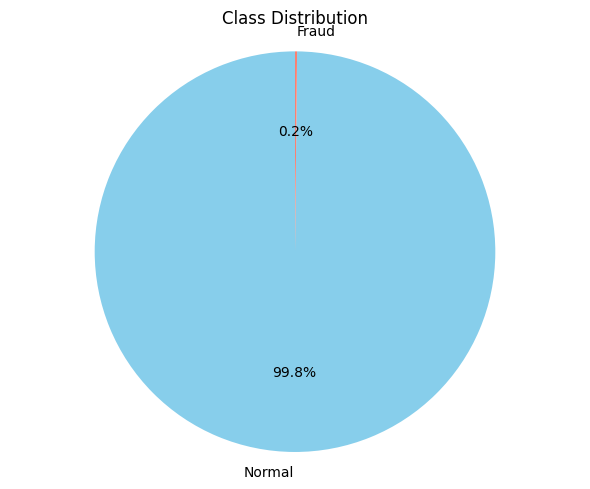

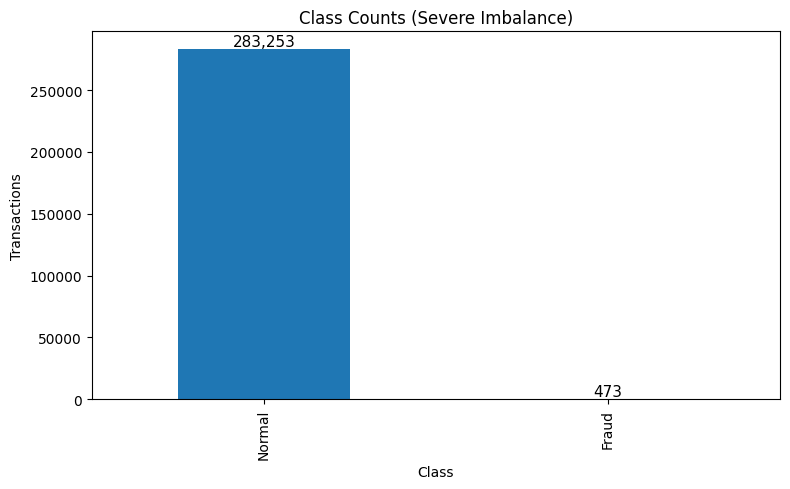

In [37]:
counts = df['Class'].value_counts().rename(index={0: 'Normal', 1: 'Fraud'})
plt.subplots(figsize=(6,5))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(8,5))
counts.plot(kind='bar', ax=ax)
for i, v in enumerate(counts.values):
    ax.text(i, v, f"{v:,}", ha='center', va='bottom', fontsize=11)
ax.set_title('Class Counts (Severe Imbalance)')
ax.set_ylabel('Transactions'); ax.set_xlabel('Class')
plt.tight_layout()
plt.show()


d:\Udemy -Complete Generative AI Course\Learning\venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


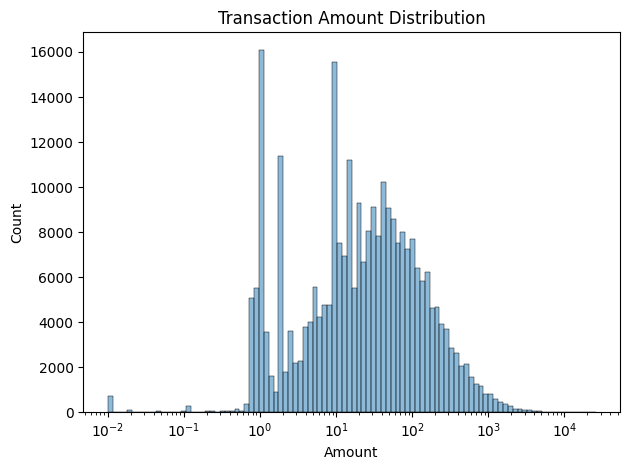

In [38]:
sns.histplot(df['Amount'], bins=100, log_scale=True, kde=True)
plt.title('Transaction Amount Distribution')
plt.tight_layout()
plt.show()


**Fraud Rate by Hour**

C:\Users\HP\AppData\Local\Temp\ipykernel_10468\1013803348.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_by_hour.index, y=fraud_by_hour.values, palette=pal)


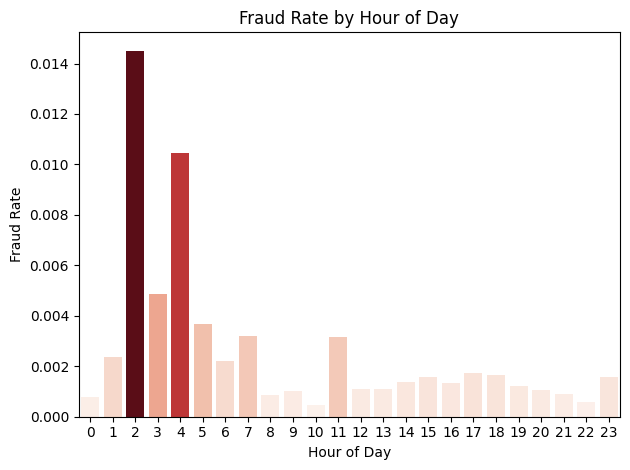

In [40]:
fraud_by_hour = df.groupby('hour_mod24')['Class'].mean()

cmap = sns.color_palette("Reds", as_cmap=True)
vals = (fraud_by_hour/fraud_by_hour.max()).values
pal = [cmap(v) for v in vals]

sns.barplot(x=fraud_by_hour.index, y=fraud_by_hour.values, palette=pal)
plt.title('Fraud Rate by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate')
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_10468\3965569928.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transcation_per_hr.index, y=transcation_per_hr.values, palette='Blues')


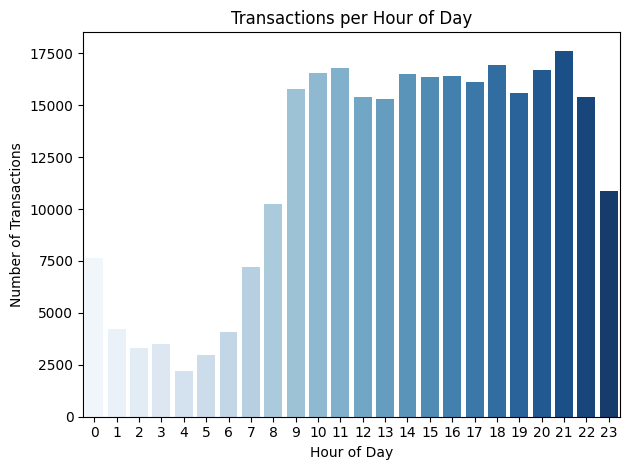

In [44]:
transcation_per_hr = df.groupby('hour_mod24')['Class'].count()

sns.barplot(x=transcation_per_hr.index, y=transcation_per_hr.values, palette='Blues')
plt.title('Transactions per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

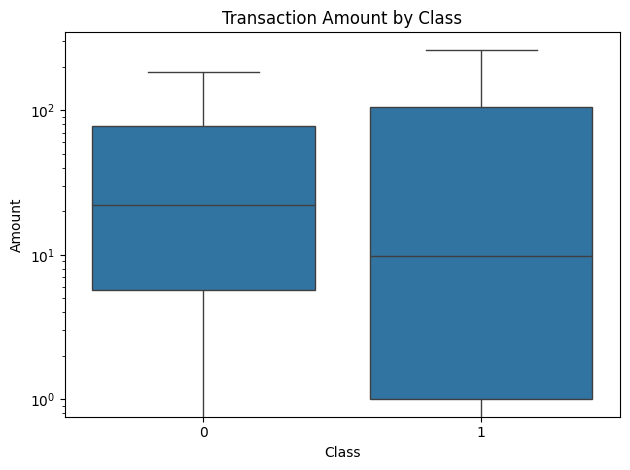

In [45]:
sns.boxplot(x= "Class", y="Amount" , data=df , showfliers=False)
plt.yscale("log")
plt.title("Transaction Amount by Class")
plt.tight_layout()
plt.show()

**Amount deciles vs fraud rate**

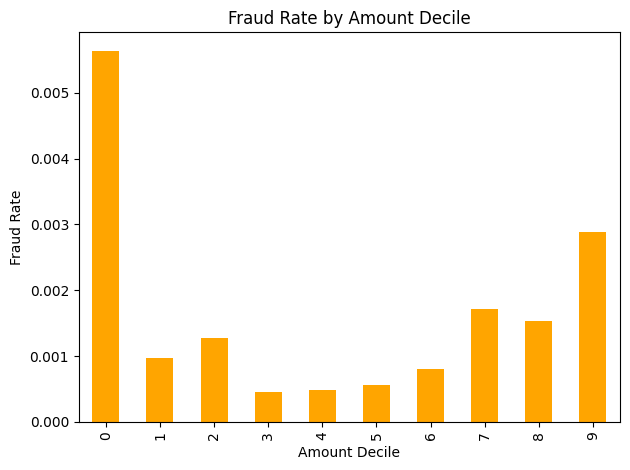

In [46]:
df['Amount_decile'] = pd.qcut(df['Amount'], 10, labels=False)
amount_fraud_rate = df.groupby('Amount_decile')['Class'].mean()
amount_fraud_rate.plot(kind='bar', color='orange')
plt.title('Fraud Rate by Amount Decile')
plt.xlabel('Amount Decile')
plt.ylabel('Fraud Rate')
plt.tight_layout()
plt.show()

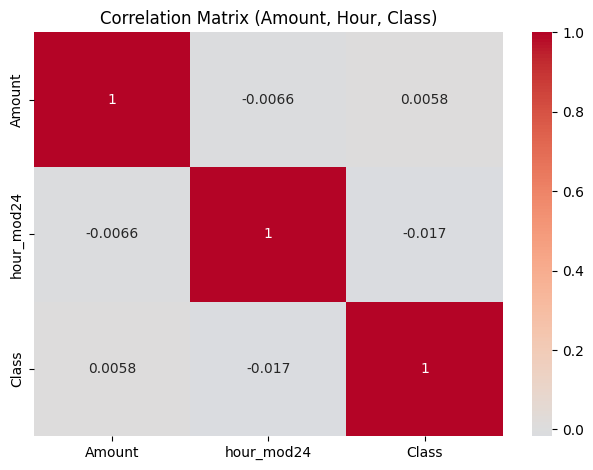

In [52]:
sns.heatmap(df[["Amount","hour_mod24","Class"]].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix (Amount, Hour, Class)")
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_10468\742507933.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_part  = df.groupby("DayPart")["Class"].mean().reindex(labels)
C:\Users\HP\AppData\Local\Temp\ipykernel_10468\742507933.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_by_part.index, y=fraud_by_part.values, palette="rocket")


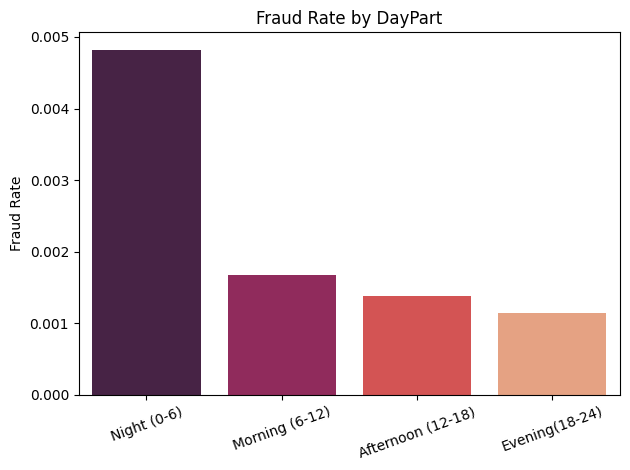

In [54]:
bins   = [0,6,12,18,24]
labels = ["Night (0-6)", "Morning (6-12)", "Afternoon (12-18)", "Evening(18-24)"]
df["DayPart"] = pd.cut(df["hour_mod24"], bins=bins, labels=labels, right=False, include_lowest=True)


fraud_by_part  = df.groupby("DayPart")["Class"].mean().reindex(labels)

sns.barplot(x=fraud_by_part.index, y=fraud_by_part.values, palette="rocket")
plt.xticks(rotation=20)
plt.title("Fraud Rate by DayPart")
plt.xlabel("")
plt.ylabel("Fraud Rate")
plt.tight_layout()
plt.show()